In [1]:
%load_ext autoreload
%autoreload 2

In [16]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [29]:
import pandas as pd

In [7]:
from finlib.tick_data import read_csv
from finlib.bars import time_bars, tick_bars, volume_bars, dollar_bars

import matplotlib.pyplot as plt

tick_data = read_csv('../data/test/binance_ticks.csv')

In [8]:
tick_data.head()

,trade_id,price,qty,quoteQty,time,isBuyerMaker,isBestMatch
0,222472783,7195.24,0.001500,10.792860,1577836800594,True,True
1,222472784,7196.25,0.022706,163.398053,1577836800862,False,True
2,222472785,7196.25,0.099650,717.106312,1577836800862,False,True
3,222472786,7196.25,0.001543,11.103814,1577836800998,False,True
4,222472787,7195.25,0.400000,2878.100000,1577836801503,True,True


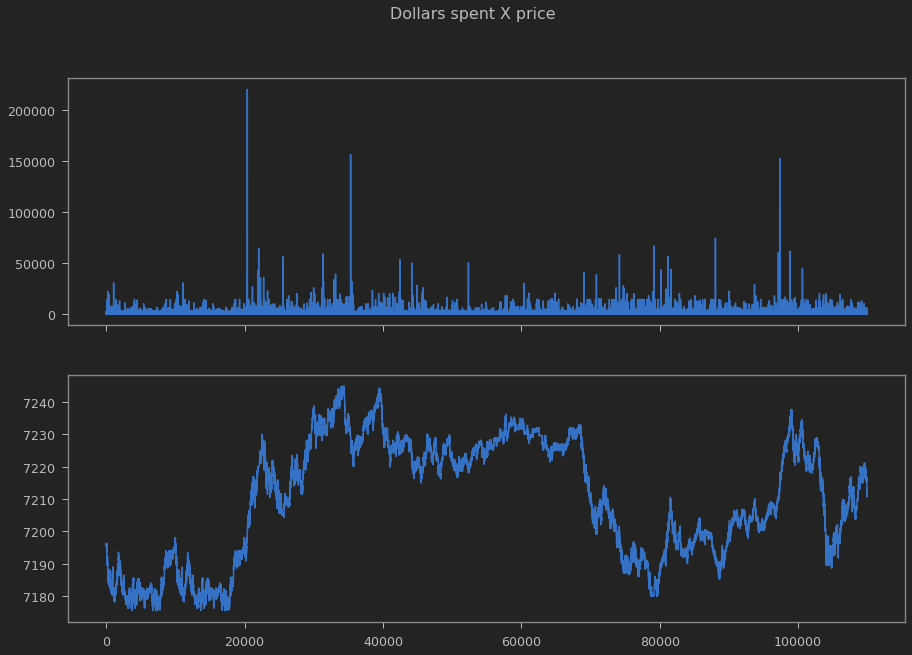

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(15, 10))
fig.suptitle('Dollars spent X price')
ax1.plot(tick_data['quoteQty'])
ax2.plot(tick_data['price'])
plt.show()

In [10]:
time_bars_ = time_bars(tick_data, '1S')

time_bars_

,time,open,close,high,low,volume_contracts,volume_dollars,buyer_maker_pct,best_match_pct
0,2020-01-01 00:00:00.594,7195.24,7196.25,7196.25,7195.24,0.250798,1804.802077,0.250000,1.0
1,2020-01-01 00:00:01.503,7195.25,7196.24,7196.24,7195.24,1.293336,9306.356791,0.058824,1.0
2,2020-01-01 00:00:02.623,7196.22,7195.24,7196.24,7195.24,0.528896,3805.940374,0.166667,1.0
3,2020-01-01 00:00:03.420,7195.83,7195.83,7195.83,7195.83,0.089730,645.681826,0.000000,1.0
4,2020-01-01 00:00:04.458,7195.24,7195.24,7195.24,7195.24,0.150432,1082.394344,1.000000,1.0
...,...,...,...,...,...,...,...,...,...
44903,2020-01-01 12:28:23.120,7213.23,7213.08,7213.23,7213.08,0.093954,677.698766,0.250000,1.0
44904,2020-01-01 12:28:24.244,7213.08,7212.69,7213.08,7210.63,0.788641,5687.701226,0.727273,1.0
44905,NaT,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
44906,2020-01-01 12:28:26.092,7212.06,7212.12,7212.16,7211.97,1.107114,7984.493605,0.000000,1.0


In [11]:
tick_bars_ = tick_bars(tick_data, n=500)

tick_bars_

,time,open,close,high,low,volume_contracts,volume_dollars,buyer_maker_pct,best_match_pct
0,2020-01-01 00:00:00.594,7195.24,7186.60,7196.25,7183.14,52.455597,377074.939211,0.566,1.0
1,2020-01-01 00:01:02.711,7186.60,7181.60,7188.94,7180.26,29.740348,213653.901079,0.470,1.0
2,2020-01-01 00:04:17.169,7181.60,7184.60,7184.62,7178.20,44.639747,320546.053786,0.476,1.0
3,2020-01-01 00:08:02.576,7184.21,7190.13,7193.53,7183.45,47.826586,343802.489143,0.436,1.0
4,2020-01-01 00:11:42.518,7190.13,7183.36,7190.28,7180.24,32.543135,233781.061902,0.538,1.0
...,...,...,...,...,...,...,...,...,...
215,2020-01-01 12:09:47.207,7214.78,7212.64,7216.76,7206.00,60.361928,435340.495673,0.488,1.0
216,2020-01-01 12:12:47.545,7212.90,7207.28,7213.83,7203.62,35.866080,258529.142487,0.426,1.0
217,2020-01-01 12:16:41.528,7206.80,7218.05,7218.10,7206.80,45.690367,329578.744300,0.396,1.0
218,2020-01-01 12:20:45.843,7217.87,7219.57,7220.00,7215.00,40.328536,291062.291457,0.548,1.0


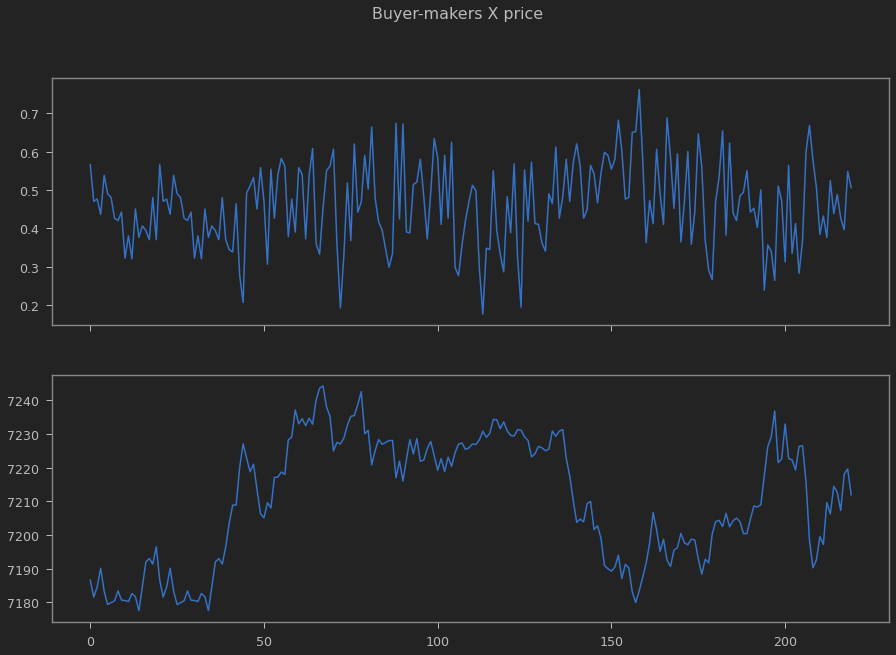

In [20]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(15, 10))
fig.suptitle('Buyer-makers X price')
ax1.plot(tick_bars_['buyer_maker_pct'])
ax2.plot(tick_bars_['close'])
plt.show()

In [21]:
volume_bars_ = volume_bars(tick_data)
volume_bars_

,time,open,close,high,low,volume_contracts,volume_dollars,buyer_maker_pct,best_match_pct
0,2020-01-01 00:00:00.594,7195.24,7190.35,7196.25,7190.30,9.286143,66800.380408,0.512000,1.0
1,2020-01-01 00:00:14.956,7190.33,7190.66,7192.12,7189.39,11.813793,84946.733893,0.463768,1.0
2,2020-01-01 00:00:24.943,7190.65,7187.46,7190.65,7184.07,10.397827,74741.259563,0.606742,1.0
3,2020-01-01 00:00:34.228,7187.45,7183.74,7187.69,7183.74,8.957462,64366.345967,0.669355,1.0
4,2020-01-01 00:00:49.248,7183.73,7184.95,7188.06,7182.20,12.577925,90369.304738,0.539823,1.0
...,...,...,...,...,...,...,...,...,...
869,2020-01-01 12:23:24.178,7216.13,7219.85,7220.00,7215.24,9.899488,71451.631980,0.408696,1.0
870,2020-01-01 12:24:24.742,7219.04,7221.00,7221.01,7218.17,10.314400,74470.861823,0.418301,1.0
871,2020-01-01 12:25:14.409,7221.01,7217.48,7221.14,7216.44,10.355450,74753.098817,0.571429,1.0
872,2020-01-01 12:26:14.534,7217.45,7219.36,7219.37,7216.59,10.195061,73589.109967,0.542056,1.0


In [14]:
dollar_bars_ = dollar_bars(tick_data)
dollar_bars_

,time,open,close,high,low,volume_contracts,volume_dollars,buyer_maker_pct,best_match_pct
0,2020-01-01 00:00:00.594,7195.24,7196.25,7196.25,7195.24,0.125399,902.401039,0.250000,1.0
1,2020-01-01 00:00:01.503,7195.25,7196.23,7196.23,7195.25,0.534113,3843.207994,0.055556,1.0
2,2020-01-01 00:00:01.671,7196.23,7196.24,7196.24,7195.24,0.112555,809.970402,0.062500,1.0
3,2020-01-01 00:00:02.623,7196.22,7196.24,7196.24,7196.22,0.179910,1294.674499,0.000000,1.0
4,2020-01-01 00:00:02.730,7196.24,7195.83,7196.24,7195.24,0.129403,931.136601,0.250000,1.0
...,...,...,...,...,...,...,...,...,...
30194,2020-01-01 12:28:24.462,7210.63,7210.63,7210.63,7210.63,0.165150,1190.835544,1.000000,1.0
30195,2020-01-01 12:28:24.658,7212.93,7212.02,7212.98,7212.02,0.278854,2011.284823,0.000000,1.0
30196,2020-01-01 12:28:26.256,7211.99,7211.99,7211.99,7211.99,0.029493,212.703221,0.000000,1.0
30197,2020-01-01 12:28:26.744,7211.97,7212.04,7212.04,7211.97,0.967047,6974.323454,0.000000,1.0


In [42]:
tick_data

,trade_id,price,qty,quoteQty,time,isBuyerMaker,isBestMatch
0,222472783,7195.24,0.001500,10.792860,1577836800594,True,True
1,222472784,7196.25,0.022706,163.398053,1577836800862,False,True
2,222472785,7196.25,0.099650,717.106312,1577836800862,False,True
3,222472786,7196.25,0.001543,11.103814,1577836800998,False,True
4,222472787,7195.25,0.400000,2878.100000,1577836801503,True,True
...,...,...,...,...,...,...,...
109995,222572778,7211.97,0.831317,5995.433264,1577881706744,False,True
109996,222572779,7212.04,0.135730,978.890189,1577881706744,False,True
109997,222572780,7212.16,0.032953,237.662308,1577881706744,False,True
109998,222572781,7212.12,0.001535,11.070604,1577881706841,False,True


In [44]:
import numpy as np

In [ ]:
np.sign()

In [66]:
tick_data[['price', 'qty']].diff()

def tick_rule(ticks):
    price_diffs = ticks.price.diff().fillna(0)
    
    b_seq = np.ones_like(price_diffs)
    
    for index in range(1, len(price_diffs)):
        if price_diffs[index] == 0:
            b_seq[index] = b_seq[index - 1]
        else:
            b_seq[index] = np.sign(price_diffs[index])
    
    return b_seq

b_seq = tick_rule(tick_data)

b_seq.cumsum()

array([1.000e+00, 2.000e+00, 3.000e+00, ..., 2.586e+03, 2.585e+03,
       2.584e+03])